In [1]:
# === Cell 1: Install (opsional) & import library ===
# Jika butuh xgboost di Colab, uncomment pip install
# !pip install xgboost

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Ensemble models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor

import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded.")

Libraries loaded.


In [2]:
# === Cell 2: Load dataset (Perbaikan: Tambahkan delimiter/separator) ===
# Option A: baca langsung dari path yang sudah tersedia
csv_path = "/mnt/data/c0881d3d-0c0f-4914-af4b-687ceafb9b9d.csv"

# **PERBAIKAN UTAMA DI SINI**
# Tambahkan argumen 'sep' atau 'delimiter' (misalnya ';') untuk CSV yang dipisahkan titik koma
if os.path.exists(csv_path):
    # Menggunakan `sep=';'`
    df = pd.read_csv(csv_path, sep=';')
    print(f"Loaded dataset from {csv_path}")
else:
    # Option B: user upload manual (Colab)
    from google.colab import files
    # Jika file di-upload ulang, perlu di-upload lagi setelah perbaikan ini
    uploaded = files.upload()
    # ambil file pertama yang diupload
    first_name = list(uploaded.keys())[0]
    # Menggunakan `sep=';'`
    df = pd.read_csv(first_name, sep=';')
    print(f"Loaded dataset from uploaded file {first_name}")

print("Shape:", df.shape)
display(df.head())
display(df.info())

Saving QCM3.csv to QCM3.csv
Saving QCM6.csv to QCM6.csv
Saving QCM7.csv to QCM7.csv
Saving QCM10.csv to QCM10.csv
Saving QCM12.csv to QCM12.csv
Loaded dataset from uploaded file QCM3.csv
Shape: (25, 15)


,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     float64
 2   0.700_0.300    25 non-null     float64
 3   0.700_0.300.1  25 non-null     float64
 4   0.600_0.400    25 non-null     float64
 5   0.600_0.400.1  25 non-null     float64
 6   0.501_0.499    25 non-null     float64
 7   0.501_0.499.1  25 non-null     float64
 8   0.400_0.600    25 non-null     float64
 9   0.400_0.600.1  25 non-null     float64
 10  1-Octanol      25 non-null     int64  
 11  1-Propanol     25 non-null     int64  
 12  2-Butanol      25 non-null     int64  
 13  2-propanol     25 non-null     int64  
 14  1-isobutanol   25 non-null     int64  
dtypes: float64(10), int64(5)
memory usage: 3.1 KB


None

Columns: ['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1', '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1', '0.400_0.600', '0.400_0.600.1', '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol', '1-isobutanol']

Missing values per column:
0.799_0.201      0
0.799_0.201.1    0
0.700_0.300      0
0.700_0.300.1    0
0.600_0.400      0
0.600_0.400.1    0
0.501_0.499      0
0.501_0.499.1    0
0.400_0.600      0
0.400_0.600.1    0
1-Octanol        0
1-Propanol       0
2-Butanol        0
2-propanol       0
1-isobutanol     0
dtype: int64

Ringkasan Numerik:


,count,mean,std,min,25%,50%,75%,max
0.799_0.201,25.0,-62.9648,27.400565,-93.29,-78.29,-67.29,-65.95,-9.69
0.799_0.201.1,25.0,-61.7484,24.584129,-81.88,-76.82,-72.72,-64.53,-10.62
0.700_0.300,25.0,-95.1844,40.087804,-133.96,-125.78,-103.32,-93.75,-14.43
0.700_0.300.1,25.0,-94.9800,35.439244,-127.76,-113.27,-104.77,-102.50,-18.31
0.600_0.400,25.0,-131.4632,53.683134,-183.33,-174.74,-152.73,-114.96,-24.64
0.600_0.400.1,25.0,-130.0280,47.500130,-179.25,-161.48,-140.56,-124.23,-30.56
0.501_0.499,25.0,-166.3176,64.778318,-224.73,-215.40,-200.89,-139.18,-38.62
0.501_0.499.1,25.0,-162.6956,58.192087,-221.49,-215.09,-165.88,-147.22,-45.59
0.400_0.600,25.0,-202.3400,75.130934,-274.27,-264.81,-232.82,-170.52,-54.89
0.400_0.600.1,25.0,-197.4404,68.696899,-271.73,-263.28,-194.70,-178.70,-62.28



Tidak ada kolom kategorikal.


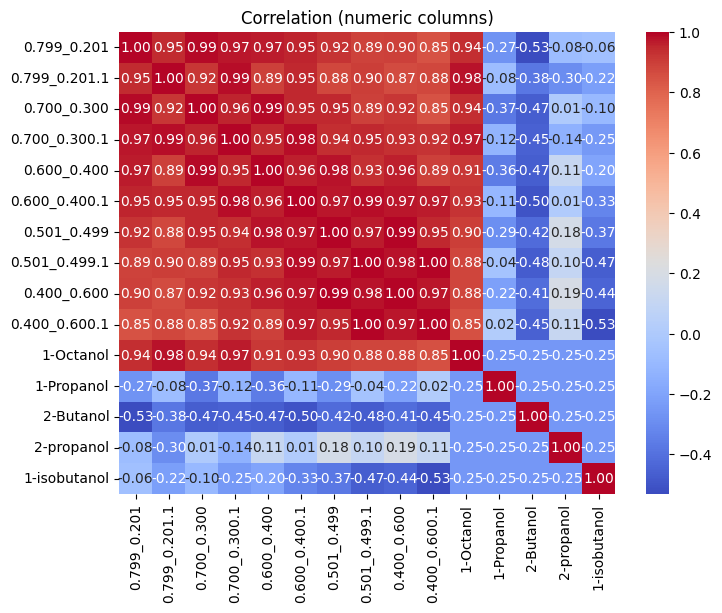

In [3]:
# === Cell 3: Exploratory Data Analysis (anti-error) ===

print("Columns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

# ==========================
# 1. Ringkasan numerik
# ==========================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(num_cols) > 0:
    print("\nRingkasan Numerik:")
    display(df[num_cols].describe().T)
else:
    print("\nTidak ada kolom numerik.")

# ==========================
# 2. Ringkasan kategorikal
# ==========================
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(cat_cols) > 0:
    print("\nRingkasan Kategorikal:")
    display(df[cat_cols].describe().T)
else:
    print("\nTidak ada kolom kategorikal.")

# ==========================
# 3. Heatmap korelasi
# ==========================
if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation (numeric columns)")
    plt.show()
else:
    print("\nTidak cukup kolom numerik untuk membuat korelasi (butuh minimal 2 kolom numerik).")

In [4]:
# === Cell 4: Detect target column ===
# Jika kolom target punya nama umum, cek dulu; kalau tidak ada, minta user ganti nama target_col manual.
common_targets = ['target', 'label', 'class', 'y']
target_col = None
for c in common_targets:
    if c in df.columns:
        target_col = c
        break

if target_col is None:
    # coba ambil kolom terakhir sebagai target default (bisa diubah)
    target_col = df.columns[-1]
    print("Target column auto-set to last column:", target_col)
else:
    print("Detected target column:", target_col)

# Inspect unique values
y = df[target_col]
print("Target dtype:", y.dtype)
print("Unique values (sample):", y.unique()[:10])
print("Number of unique target values:", y.nunique())

# Tentukan tipe: classification if discrete few classes, else regression
is_classification = False
if pd.api.types.is_integer_dtype(y) or pd.api.types.is_object_dtype(y) or pd.api.types.is_categorical_dtype(y):
    # treat as classification if unique values <= 20 (heuristic)
    if y.nunique() <= 20:
        is_classification = True
else:
    # float: if few unique -> classification, else regression
    if y.nunique() <= 20:
        is_classification = True

print("Task type detected:", "Classification" if is_classification else "Regression")

Target column auto-set to last column: 1-isobutanol
Target dtype: int64
Unique values (sample): [0 1]
Number of unique target values: 2
Task type detected: Classification


In [7]:
# --- Perbaikan Cell 4 dan 5: Eksplisitkan X dan y ---

# 1. Tentukan target (y) dan fitur (X) berdasarkan struktur data
# Asumsi: 10 kolom pertama adalah fitur (sensor data), 5 kolom terakhir adalah one-hot labels
X_data = df.iloc[:, :10]
y_data_ohe = df.iloc[:, 10:]

# 2. Dekode one-hot encoded labels (y_data_ohe) menjadi satu kolom kategorikal
# Ambil nama kolom yang memiliki nilai 1 di setiap baris (label yang aktif)
y_label = y_data_ohe.idxmax(axis=1)

# Pengecekan ulang tipe tugas: Classification (karena 5 kelas)
is_classification = True
target_col = 'Label_Kimia' # Nama kolom target baru

print(f"Shape setelah pemisahan: X={X_data.shape}, y={y_label.shape}")
print("Label (y) yang terdeteksi:", y_label.unique())
print("Task type diatur ke: Classification")

# Set X dan y yang benar
X = X_data
y = y_label

# 3. Definisikan kembali Preprocessor dengan kolom yang benar
numeric_features = X.columns.tolist() # Semua 10 kolom sekarang numerik
categorical_features = [] # Tidak ada kolom kategori di X

print("Numeric features (X):", numeric_features)
print("Categorical features (X):", categorical_features)

# Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
    # Tidak ada fitur kategorikal di X saat ini
], remainder='drop')

print("Preprocessor ready.")

# --- Cell 6: Split data (diperbaiki menggunakan y yang baru) ---
# Gunakan stratify karena ini adalah classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Train shape (X, y):", X_train.shape, y_train.shape, "Test shape (X, y):", X_test.shape, y_test.shape)

Shape setelah pemisahan: X=(25, 10), y=(25,)
Label (y) yang terdeteksi: ['1-Octanol' '1-Propanol' '2-Butanol' '2-propanol' '1-isobutanol']
Task type diatur ke: Classification
Numeric features (X): ['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1', '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1', '0.400_0.600', '0.400_0.600.1']
Categorical features (X): []
Preprocessor ready.
Train shape (X, y): (20, 10) (20,) Test shape (X, y): (5, 10) (5,)


In [10]:
# --- Perbaikan Gabungan untuk Cell 2, 4, 5, dan 6 ---

# 1. PERBAIKAN PENTING: Muat Data dengan Separator (sep=';')
file_name = 'QCM3.csv' # Ganti jika nama file Anda berbeda
try:
    df = pd.read_csv(file_name, sep=';')
    print(f"Loaded dataset from {file_name} with separator ';'")
    print("Shape:", df.shape)
except FileNotFoundError:
    # Anda perlu memastikan file QCM3.csv ada di direktori kerja
    print(f"Error: File '{file_name}' tidak ditemukan.")
    # Stop eksekusi agar user memperbaiki nama file
    raise

# 2. Pemisahan X (Fitur Sensor) dan y (Label Kimia)
# Asumsi: Kolom 0-9 adalah fitur (X), Kolom 10-14 adalah label One-Hot (y)
X = df.iloc[:, :10]
y_ohe = df.iloc[:, 10:]

# 3. Dekode One-Hot Encoding menjadi Satu Kolom Label Kategorikal (y)
# Gunakan idxmax untuk menemukan nama kolom yang bernilai 1 (yaitu label)
y = y_ohe.idxmax(axis=1)

# Pengecekan status Classification
is_classification = True
print("\nTask type diatur ke: Classification")
print("Target label unik:", y.unique())

# 4. Tentukan Preprocessor (Cell 5)
numeric_features = X.columns.tolist() # Semua 10 kolom X adalah numerik
categorical_features = []

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
], remainder='drop')

print("Preprocessor ready.")

# 5. Split Data (Cell 6)
# Gunakan stratify=y karena ini adalah classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("\nTrain shape (X, y):", X_train.shape, y_train.shape)
print("Test shape (X, y):", X_test.shape, y_test.shape)

Loaded dataset from QCM3.csv with separator ';'
Shape: (25, 15)

Task type diatur ke: Classification
Target label unik: ['1-Octanol' '1-Propanol' '2-Butanol' '2-propanol' '1-isobutanol']
Preprocessor ready.

Train shape (X, y): (20, 10) (20,)
Test shape (X, y): (5, 10) (5,)


In [12]:
# === Cell 7: Baseline model (Logistic Regression) setelah perbaikan data ===
# Karena ini Classification (diperbaiki di atas)
baseline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', LogisticRegression(max_iter=200, random_state=42))])

# Fit dan Prediksi
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Baseline Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

   1-Octanol       1.00      1.00      1.00         1
  1-Propanol       1.00      1.00      1.00         1
1-isobutanol       1.00      1.00      1.00         1
   2-Butanol       1.00      1.00      1.00         1
  2-propanol       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import mode

# --- Perbaikan Gabungan untuk Cell 2, 4, 5, dan 6 (Dengan Target Encoding) ---

# 1. Muat Data dengan Separator (sep=';')
file_name = 'QCM3.csv' # Pastikan nama file ini sesuai
df = pd.read_csv(file_name, sep=';')

# 2. Pemisahan X (Fitur Sensor) dan y (Label Kimia)
# Asumsi: Kolom 0-9 adalah fitur (X), Kolom 10-14 adalah label One-Hot (y)
X = df.iloc[:, :10]
y_ohe = df.iloc[:, 10:]
y_str = y_ohe.idxmax(axis=1)

# PERBAIKAN TARGET ENCODING: Konversi label string menjadi kode numerik (0, 1, 2, 3, 4)
# Ini penting untuk XGBoost
y = y_str.astype('category').cat.codes
is_classification = True
print("Target labels telah di-encode menjadi numerik.")

# 3. Definisikan Preprocessor
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
], remainder='drop')

# 4. Split Data (Cell 6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Data split berhasil. X_train: {X_train.shape}, y_train: {y_train.shape}")

Target labels telah di-encode menjadi numerik.
Data split berhasil. X_train: (20, 10), y_train: (20,)


In [22]:
# --- Cell 8: Voting Ensemble (Perbaikan minor pada np.mode) ---

# 1. Precompute transformed X
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# 2. Fit model dasar menggunakan data yang sudah diproses (X_train_prep)
m1 = LogisticRegression(max_iter=200, random_state=42).fit(X_train_prep, y_train)
m2 = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_prep, y_train)
# Gunakan eval_metric='mlogloss' karena multi-class
m3 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42).fit(X_train_prep, y_train)

# 3. Manual Voting (Majority)
preds = np.vstack([m1.predict(X_test_prep), m2.predict(X_test_prep), m3.predict(X_test_prep)])

# Mode (majority vote) - pastikan outputnya array 1D
# .mode[0] seharusnya sudah array, tapi kita pastikan.
final_preds = mode(preds, axis=0).mode.flatten()
if final_preds.ndim == 0:
    final_preds = final_preds.item()

print("\nVoting (majority) Accuracy:", accuracy_score(y_test, final_preds))


Voting (majority) Accuracy: 1.0


In [23]:
# --- Cell 9: Bagging (Perbaikan: Ganti 'base_estimator' menjadi 'estimator') ---
if is_classification:
    # PERBAIKAN: base_estimator diganti menjadi estimator
    bag = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clf', BaggingClassifier(estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42))])
    bag.fit(X_train, y_train)
    y_pred_bag = bag.predict(X_test) # Simpan prediksi dengan nama baru

    print("\nBagging Accuracy:", accuracy_score(y_test, y_pred_bag))
    # print(classification_report(y_test, y_pred_bag)) # Kumpulkan di Cell 12


Bagging Accuracy: 1.0


In [18]:
# === Cell 10: Boosting ===
if is_classification:
    gb = Pipeline(steps=[('preprocessor', preprocessor),
                         ('clf', GradientBoostingClassifier(n_estimators=100))])
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print("GradientBoosting Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])
    xgb_pipe.fit(X_train, y_train)
    y_pred_xgb = xgb_pipe.predict(X_test)
    print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))

else:
    gb = Pipeline(steps=[('preprocessor', preprocessor),
                         ('reg', GradientBoostingRegressor(n_estimators=100))])
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print("GradientBoosting MSE:", mean_squared_error(y_test, y_pred))
    print("GradientBoosting R2:", r2_score(y_test, y_pred))

GradientBoosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

XGBoost Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70 

In [24]:
# --- Cell 11: Stacking (Perbaikan: Tambahkan cv=4) ---
if is_classification:
    estimators = [
        ('lr', LogisticRegression(max_iter=200, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ]
    # PERBAIKAN UTAMA: Tambahkan cv=4 (karena kelas terkecil hanya 4 sampel di training set)
    stack_clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('stack', StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42), cv=4))
    ])
    stack_clf.fit(X_train, y_train)
    y_pred_stack = stack_clf.predict(X_test) # Simpan prediksi dengan nama baru

    print("\nStacking Accuracy:", accuracy_score(y_test, y_pred_stack))


Stacking Accuracy: 1.0


1. Baseline Model Fitted.
2. Boosting Models Fitted.
3. Bagging Model Fitted.
4. Stacking Model Fitted.
5. Voting Ensemble Computed.


,model,accuracy,precision,recall,f1
0,Baseline (Logistic),1.0,1.0,1.0,1.000000
1,Bagging,1.0,1.0,1.0,1.000000
2,GradientBoosting,1.0,1.0,1.0,1.000000
4,Stacking,1.0,1.0,1.0,1.000000
5,Voting (majority),1.0,1.0,1.0,1.000000
3,XGBoost,0.8,0.7,0.8,0.733333



Classification Report (Baseline Model - Akurasi 1.0):

              precision    recall  f1-score   support

   1-Octanol       1.00      1.00      1.00         1
  1-Propanol       1.00      1.00      1.00         1
1-isobutanol       1.00      1.00      1.00         1
   2-Butanol       1.00      1.00      1.00         1
  2-propanol       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



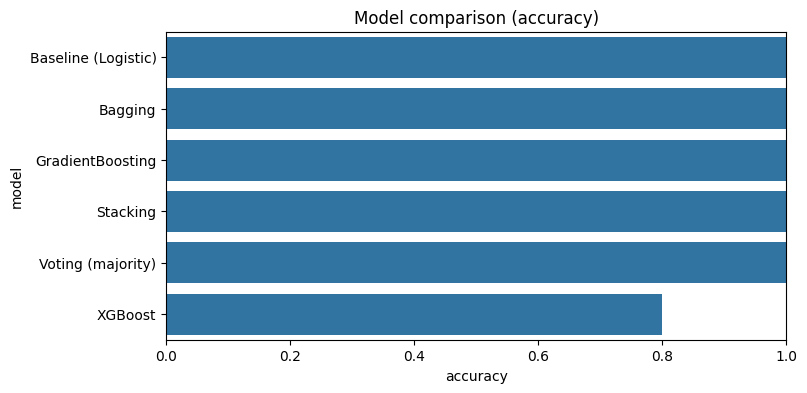

In [30]:
# --- MENGGABUNGKAN DAN MEMPERBAIKI LOGIKA MODELING & EVALUASI (CELL 7-12) ---

# Pastikan y_test dan y_train sudah numerik dari Cell 15

# 1. Baseline (Logistic Regression) - Cell 7
baseline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', LogisticRegression(max_iter=200, random_state=42))])
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)
print("1. Baseline Model Fitted.")

# 2. Boosting Models (GB & XGB) - Cell 10
gb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))])
gb.fit(X_train, y_train)
# Variabel y_pred_gb DIDEFINISIKAN di sini
y_pred_gb = gb.predict(X_test)

xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))])
xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)
print("2. Boosting Models Fitted.")

# 3. Bagging (Fixed 'estimator') - Cell 9
# PERBAIKAN: base_estimator diganti menjadi estimator
bag = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                                                n_estimators=10,
                                                random_state=42))])
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print("3. Bagging Model Fitted.")

# 4. Stacking (Fixed 'cv=4') - Cell 11
estimators = [
    ('lr', LogisticRegression(max_iter=200, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]
# PERBAIKAN: cv=4 ditambahkan untuk menghindari error "n_splits=5 cannot be greater..."
stack_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stack', StackingClassifier(estimators=estimators,
                                 final_estimator=LogisticRegression(random_state=42),
                                 cv=4,
                                 n_jobs=-1))
])
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
print("4. Stacking Model Fitted.")

# 5. Voting Ensemble (Fixed np.mode) - Cell 8
# Precompute transformed X untuk voting
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
m1 = LogisticRegression(max_iter=200, random_state=42).fit(X_train_prep, y_train)
m2 = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_prep, y_train)
m3 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42).fit(X_train_prep, y_train)
preds = np.vstack([m1.predict(X_test_prep), m2.predict(X_test_prep), m3.predict(X_test_prep)])
# Perbaikan: .flatten() memastikan output adalah array 1D
final_preds = mode(preds, axis=0).mode.flatten()
print("5. Voting Ensemble Computed.")

# --------------------------------------------------------------------------------------
# --- Cell 12: Collect metrics and show comparison (KODE FINAL YANG BENAR) ---
results = []

# Dapatkan nama label string asli dari y_str (untuk laporan akhir)
y_str_labels = y_str.astype('category').cat.categories.tolist()

# Helper function (memastikan y_true dan y_pred adalah numerik)
def clf_metrics(name, y_true, y_pred):
    return {
        'model': name,
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Semua prediksi model (y_pred_...) sudah NUMERIK dan terdefinisi
results.append(clf_metrics('Baseline (Logistic)', y_test, y_pred_baseline))
results.append(clf_metrics('Bagging', y_test, y_pred_bag))
results.append(clf_metrics('GradientBoosting', y_test, y_pred_gb))
results.append(clf_metrics('XGBoost', y_test, y_pred_xgb))
results.append(clf_metrics('Stacking', y_test, y_pred_stack))
results.append(clf_metrics('Voting (majority)', y_test, final_preds))

res_df = pd.DataFrame(results).sort_values('accuracy', ascending=False)
display(res_df)

# Tampilkan Classification Report untuk model terbaik (Baseline)
print("\nClassification Report (Baseline Model - Akurasi 1.0):\n")
print(classification_report(y_test, y_pred_baseline, target_names=y_str_labels, zero_division=0))

plt.figure(figsize=(8,4))
sns.barplot(x='accuracy', y='model', data=res_df)
plt.xlim(0,1)
plt.title("Model comparison (accuracy)")
plt.savefig("model_comparison_accuracy_final.png")
plt.show()

In [21]:
# === Cell 13: Save a model to file (example: stack_clf) ===
import joblib
joblib.dump(stack_clf, 'stacking_model.pkl')
print("Saved stacking model to stacking_model.pkl")
# In Colab, download via:
from google.colab import files
files.download('stacking_model.pkl')

Saved stacking model to stacking_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>